In [133]:
from textblob import TextBlob
import csv
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('csvdata.csv', 'r', encoding="utf8") as f:
  reader = csv.reader(f)
  datalist = tuple(reader)

In [4]:
sophchat = [msg for msg in datalist if ("USER0@facebook.com" in msg[0] and "USER1@facebook.com" in msg[0])]

In [21]:
chat = [TextBlob(msg[3]) for msg in sophchat]
dates = [msg[2][:10] for msg in sophchat]
times = [msg[2][11:16] for msg in sophchat]
print(dates[5], times[5])

2015-04-30 03:48


In [176]:
chatdf = []
for i in range(len(chat)):
    phrase = chat[i]
    chatdf.extend([{'subjectivity' : phrase.sentiment.subjectivity
                    , 'polarity' : phrase.sentiment.polarity
                    , 'date' : dates[i], 'time' : times[i]}])

In [177]:
chatdf = pd.DataFrame(chatdf)
print(chatdf.head(3))
chatdf.describe()

         date  polarity  subjectivity   time
0  2015-04-29      0.00          0.00  18:06
1  2015-04-29      0.60          1.00  18:06
2  2015-04-29      0.25          0.25  23:04


,polarity,subjectivity
count,16954.000000,16954.000000
mean,0.182520,0.424653
std,0.317105,0.317170
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.146771,0.483333
75%,0.366667,0.666667
max,1.000000,1.000000


In [199]:
#Group data into days
n = -1
chatdfGroupedByDay = []
tempDate = chatdf['date'][0]#[0:7] #comment to change to days
print(tempDate)
for i in range(len(chatdf.index)):
    if tempDate == chatdf['date'][i]:#[0:7]:
        n+= 1
    else:
        sentimentMean = round(chatdf['subjectivity'][i-n:i-1].mean(), 3)
        polarityMean = round(chatdf['polarity'][i-n:i-1].mean(), 3)
        chatdfGroupedByDay.extend([{'subjectivity' : 0 if np.isnan(sentimentMean) else sentimentMean*5000
                                    , 'polarity' : 0 if np.isnan(polarityMean) else polarityMean*5000
                                    , 'date' : tempDate, 'entries' : n}])
        tempDate = chatdf['date'][i]#[0:7]
        n=1

2015-04-29


In [200]:
chatdfGroupedByDay = pd.DataFrame(chatdfGroupedByDay)
chatdfGroupedByDay.index = pd.to_datetime(chatdfGroupedByDay['date'])
del chatdfGroupedByDay['date']
chatdfGroupedByDay.head(3)

,entries,polarity,subjectivity
date,,,
2015-04-29,2,3000.0,5000.0
2015-04-30,117,325.0,1700.0
2015-05-01,8,215.0,500.0


In [201]:
del chatdfGroupedByDay['subjectivity']
chatdfGroupedByMonth = chatdfGroupedByDay.resample('MS').agg({'polarity': np.mean, 'entries': np.sum})
chatdfGroupedByMonth.head(5)

,polarity,entries
date,,
2015-04-01,1662.500000,119.0
2015-05-01,741.176471,461.0
2015-06-01,1094.687500,856.0
2015-07-01,946.153846,1818.0
2015-08-01,1045.000000,68.0


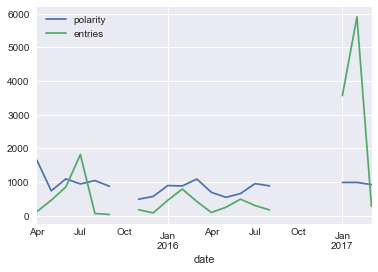

In [196]:
chatdfGroupedByMonth.plot()